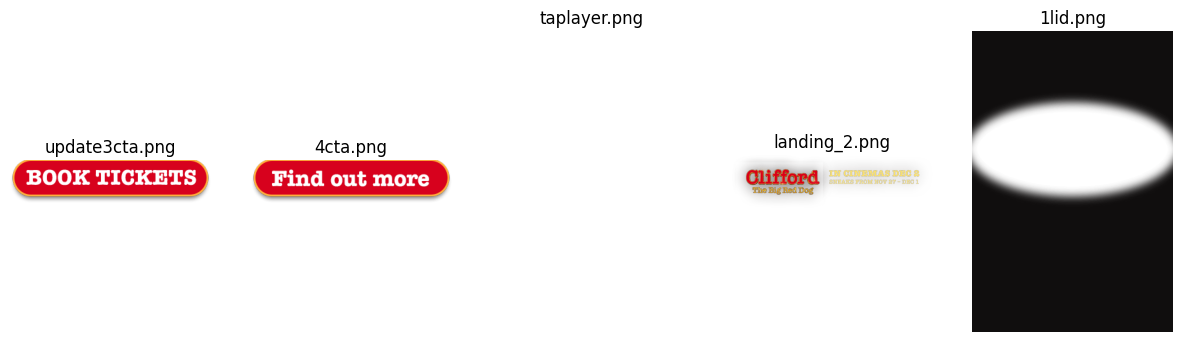

In [44]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the Assets folder
assets_folder = '../data/Challenge_Data/Assets/'

# Function to load and display images
def load_and_display_images(folder_path, num_images=5):
    image_paths = []
    for subdir, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(subdir, file))
            if len(image_paths) >= num_images:
                break
        if len(image_paths) >= num_images:
            break
    
    plt.figure(figsize=(15, 10))
    for i, image_path in enumerate(image_paths):
        img = Image.open(image_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(os.path.basename(image_path))
        plt.axis('off')
    plt.show()

# Load and display sample images
load_and_display_images(assets_folder)


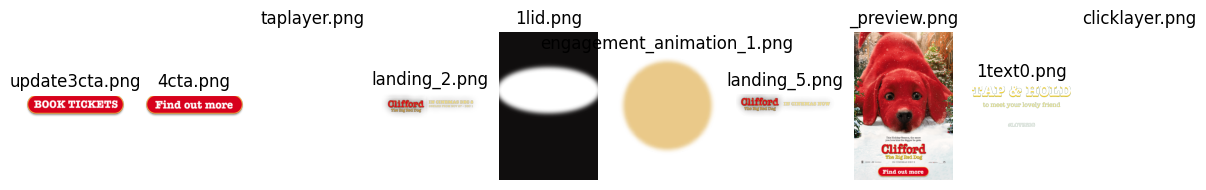

In [45]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the Assets folder
assets_folder = '../data/Challenge_Data/Assets/'

# Function to load and display images
def load_and_display_images(folder_path, num_images=10):
    image_paths = []
    for subdir, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(subdir, file))
            if len(image_paths) >= num_images:
                break
        if len(image_paths) >= num_images:
            break
    
    plt.figure(figsize=(15, 10))
    for i, image_path in enumerate(image_paths):
        img = Image.open(image_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(os.path.basename(image_path))
        plt.axis('off')
    plt.show()

# Load and display sample images
load_and_display_images(assets_folder)


In [46]:
import numpy as np

# Function to extract color histogram features from an image
def extract_color_histogram(image_path, bins=(8, 8, 8)):
    image = Image.open(image_path)
    image = image.resize((128, 128))  # Resize for consistency
    image_array = np.array(image)
    
    # Check if the image is grayscale
    if len(image_array.shape) == 2:
        image_array = np.stack((image_array,) * 3, axis=-1)  # Convert grayscale to RGB by duplicating channels
    
    hist = np.histogramdd(image_array.reshape(-1, 3), bins=bins, range=((0, 256), (0, 256), (0, 256)))
    hist = hist[0].flatten()  # Flatten the histogram
    return hist

In [47]:

# Extract features from sample images
def extract_features_from_images(folder_path, num_images=10):
    image_paths = []
    features = []
    for subdir, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(subdir, file))
            if len(image_paths) >= num_images:
                break
        if len(image_paths) >= num_images:
            break
    
    for image_path in image_paths:
        features.append(extract_color_histogram(image_path))
    
    return np.array(features)

In [48]:
# Extract features from sample images
features = extract_features_from_images(assets_folder)
print("Extracted Features Shape:", features.shape)


Extracted Features Shape: (10, 512)


In [49]:
import extcolors
import pandas as pd
from colormap import rgb2hex
from matplotlib import pyplot as plt
from PIL import Image
from typing import Tuple
import cv2 

In [50]:
# Load CSV file
per_df = pd.read_csv('../data/Challenge_Data/performance_data.csv')
per_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   game_id       905 non-null    object 
 1   preview_link  905 non-null    object 
 2   ER            905 non-null    float64
 3   CTR           905 non-null    float64
dtypes: float64(2), object(2)
memory usage: 28.4+ KB


In [51]:
per_df.head(5)

,game_id,preview_link,ER,CTR
0,bfbf7a2b7ac635e67877b1ab87fd6629,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.209269,0.058438
1,945010afbf9a55bbdffcb0895f946155,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.274552,0.074731
2,e68e20f592457b875ce29757ab855dfe,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.103688,0.042228
3,adunit-nestle-purina-friskies-mob,https://s3.ap-southeast-1.amazonaws.com/a.futu...,0.136963,0.005393
4,adunit-lionsgate-uwomt-user-slider-sensory-vid...,https://s3.us-west-1.amazonaws.com/a.futureadl...,0.114208,0.016443


In [52]:
per_df.loc[0].preview_link

'https://s3.us-east-1.amazonaws.com/a.futureadlabs.com-us-east-1-backup/us-east-1/games/bfbf7a2b7ac635e67877b1ab87fd6629/b7a604b3b08f0862ef0e/index.html'

In [53]:
def locate_image_on_image(locate_image: str, on_image: str, prefix: str = '', visualize: bool = False, color: Tuple[int, int, int] = (0, 0, 255)):
    try:
        image = cv2.imread(on_image)
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        template = cv2.imread(locate_image, 0)
        result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF)
        _, _, _, max_loc = cv2.minMaxLoc(result)
        height, width = template.shape[:2]
        top_left = max_loc
        bottom_right = (top_left[0] + width, top_left[1] + height)

        if visualize:
            cv2.rectangle(image, top_left, bottom_right, color, 1)
            plt.figure(figsize=(10, 10))
            plt.axis('off')
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.imshow(image)

        return {f'{prefix}top_left_pos': top_left, f'{prefix}bottom_right_pos': bottom_right}

    except cv2.error as err:
        print(err)


{'eng_top_left_pos': (10, 32), 'eng_bottom_right_pos': (390, 95)}

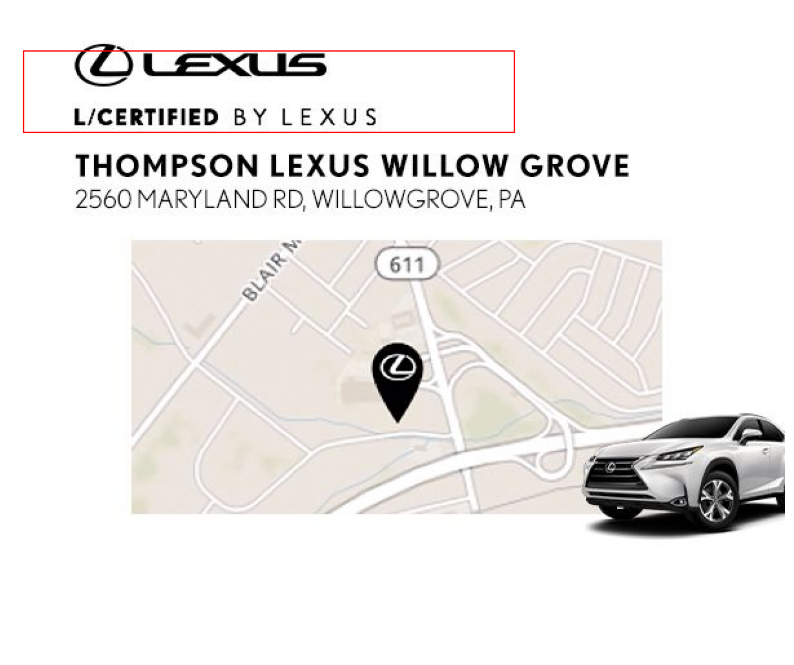

In [54]:
locate_image_on_image('../data/Challenge_Data/Assets/0a22f881b77f00220f2034c21a18b854/engagement_instruction_1.png', '../data/Challenge_Data/Assets/0a22f881b77f00220f2034c21a18b854/end-bg.jpg', prefix='eng_', visualize=True)

 ## Extracting Colors

In [55]:
import extcolors
import pandas as pd
from colormap import rgb2hex
from matplotlib import pyplot as plt
from PIL import Image

In [56]:
def identify_color_composition(image,
                               tolerance: int = 12,
                               limit: int = 2,
                               visualize: bool = False) -> None:
    """Function that identifies the color composition of a
    given image path."""

    extracted_colors = extcolors.extract_from_path(
        image, tolerance=tolerance, limit=limit)

    identified_colors = color_to_df(extracted_colors)

    if not visualize:
        return identified_colors

    list_color = list(identified_colors['c_code'])
    list_percent = [int(i) for i in list(identified_colors['occurrence'])]

    text_c = [c + ' ' + str(round(p*100/sum(list_percent), 1)) + '%' for c, p in zip(list_color,
                                                                                     list_percent)]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(100, 100), dpi=10)
    wedges, _ = ax[0].pie(list_percent,
                          labels=text_c,
                          labeldistance=1.05,
                          colors=list_color,
                          textprops={'fontsize': 60, 'color': 'black'}
                          )

    plt.setp(wedges, width=0.3)

    # create space in the center
    plt.setp(wedges, width=0.36)

    ax[0].set_aspect("equal")
    fig.set_facecolor('grey')

    ax[1].imshow(Image.open(image))

    plt.show()

    return identified_colors


def color_to_df(extracted_colors: tuple):
    """Converts RGB Color values from extcolors output to HEX Values."""

    colors_pre_list = str(extracted_colors).replace(
        '([(', '').replace(')],', '), (').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')', '')
                  for i in colors_pre_list]

    # convert RGB to HEX code
    df_rgb_values = [(int(i.split(", ")[0].replace("(", "")),
                      int(i.split(", ")[1]),
                      int(i.split(", ")[2].replace(")", ""))) for i in df_rgb]

    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(", "")),
                           int(i.split(", ")[1]),
                           int(i.split(", ")[2].replace(")", ""))) for i in df_rgb]

    colors_df = pd.DataFrame(zip(df_color_up, df_rgb_values, df_percent),
                             columns=['c_code', 'rgb', 'occurrence'])

    return colors_df


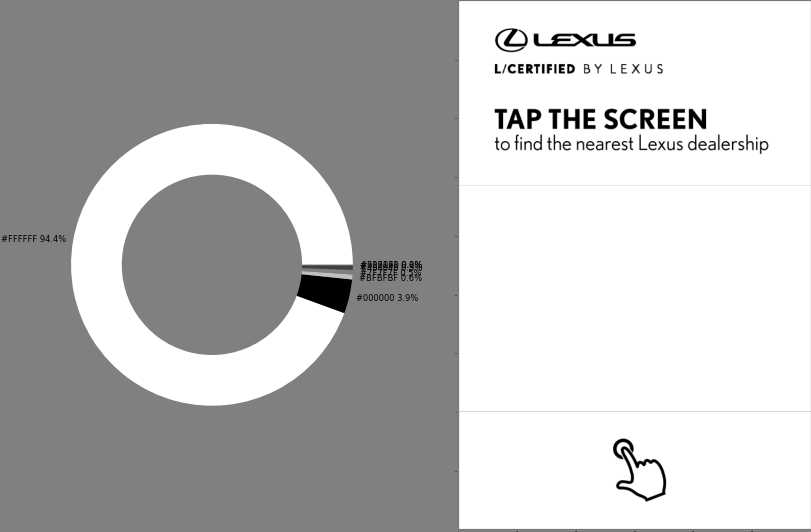

,c_code,rgb,occurrence
0,#FFFFFF,"(255, 255, 255)",291794
1,#000000,"(0, 0, 0)",12072
2,#BFBFBF,"(191, 191, 191)",1749
3,#7F7F7F,"(127, 127, 127)",1576
4,#404040,"(64, 64, 64)",1545
5,#606060,"(96, 96, 96)",178
6,#212121,"(33, 33, 33)",86


In [57]:

identify_color_composition('../data/Challenge_Data/Assets/0a59be2e7dd53d6de11a10ce3649c081/_preview.png',tolerance=12,limit=8, visualize=True)

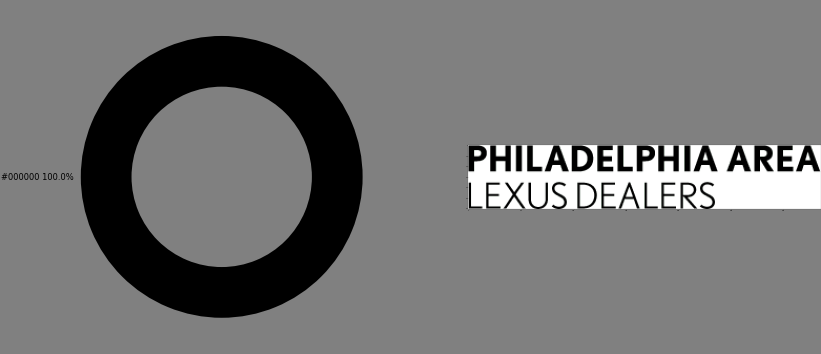

,c_code,rgb,occurrence
0,#000000,"(0, 0, 0)",6838


In [58]:
identify_color_composition('../data/Challenge_Data/Assets/0a59be2e7dd53d6de11a10ce3649c081/game_2.png',tolerance=12,limit=8, visualize=True)

In [59]:
import pytesseract
import cv2
import numpy as np
from typing import List, Tuple

In [60]:
def convert_hex_to_rgb(hex_color: str, normalize: bool = True) -> List[str]:
    """Converts a HEX color to a RGB color

    Args:
        hex_color (str): HEX color code to convert
        normalize (bool, optional): Choice to normalize calculated rgb values . Defaults to True.

    Returns:
        List[str]: List of RGB values in order, normalized or not.
    """
    colors = hex_color[1:]

    # Convert HEX color values to RGB Values
    colors = [int(colors[0:2], base=16),  # RED
              int(colors[2:4], base=16),  # GREEN
              int(colors[4:6], base=16)]  # BLUE

    # Normalize RGB values
    if normalize:
        colors = [color / 255 for color in colors]

    return colors

def get_luminance(hex_color: str) -> float:
    """Calculates the luminance of a given HEX color

    Args:
        hex_color (str): HEX color code to calculate luminance for

    Returns:
        float: luminance value of color
    """
    colors = convert_hex_to_rgb(hex_color)

    luminance = colors[0] * 0.2126 + colors[1] * 0.7152 + colors[2] * 0.0722

    return luminance

def fix_image_background(image_path: str):
    identified_colors = identify_color_composition(image_path)
    text_color = identified_colors['c_code'].to_list()[0]
    text_color_rgb = identified_colors['rgb'].to_list()[0]
    luminance = get_luminance(hex_color=text_color)

    if luminance < 140:
        background_color = (255, 255, 255)
    else:
        background_color = (0, 0, 0)

    # Load image
    image = cv2.imread(image_path)

    # Make all perfectly green pixels white
    image[np.all(image != text_color_rgb, axis=-1)] = background_color

    return image

def extract_text(image_path, tesseract_cmd: str = '', fix_background: bool = False):
    # pytesseract.pytesseract.tesseract_cmd = tesseract_cmd
    try:
        if fix_background:
            text = pytesseract.image_to_string(
                fix_image_background(image_path))
        else:
            text = pytesseract.image_to_string(image_path)

        return text

    except pytesseract.TesseractNotFoundError:
        raise Exception(
            f'Failure: Tesseract is not installed or not available in the defined path {tesseract_cmd}')

In [61]:
extract_text('../data/Challenge_Data/Assets/0a22f881b77f00220f2034c21a18b854/end-cta.png',fix_background=True)

'LEARN MORE\n\x0c'

# Step 1: Identify Top 10 Ads Based on Performance Metrics

In [62]:
import pandas as pd

# Load CSV file
data = pd.read_csv('../data/Challenge_Data/performance_data.csv')

# Sort the DataFrame by Engagement Rate (ER) or Click-Through Rate (CTR)
df_sorted = data.sort_values(by='ER', ascending=False)

# Select the top 10 ads
top_10_ads = df_sorted.head(5)

# Display the top 10 ads
print(top_10_ads)


                                          game_id  \
357              0792c911c288bd241c1e2a2b64bce488   
856              015efcdd8de3698ffc4dad6dabd6664a   
40               07f93a53c25007301d276ec20e7be491   
208  adunit-mouser-user-choice-flight4-uk-cpe-mob   
33               6a3dbf08b82e45b3f3e79844f3a9aa18   

                                          preview_link        ER       CTR  
357  https://s3.eu-west-1.amazonaws.com/a.futureadl...  0.524498  0.025249  
856  https://s3.eu-west-1.amazonaws.com/a.futureadl...  0.446696  0.034950  
40   https://s3.ap-southeast-1.amazonaws.com/a.futu...  0.440421  0.020432  
208  https://s3.us-east-1.amazonaws.com/a.futureadl...  0.439367  0.160604  
33   https://s3.ap-southeast-1.amazonaws.com/a.futu...  0.429701  0.165093  


Step 2: Analyze Each Ad

We will iterate through the top 10 ads and apply our image analysis skills.



In [63]:
import os

# Define the path to the game ID directory
game_id = 'f52568446cd557df708c44efb668789c'
assets_folder = f'../data/Challenge_Data/Assets/{game_id}'

# List all files in the directory
try:
    assets = os.listdir(assets_folder)
    print(f"Assets in directory {assets_folder}:")
    for asset in assets:
        print(asset)
except FileNotFoundError:
    print(f"The directory {assets_folder} does not exist.")
except Exception as e:
    print(f"An error occurred: {e}")


Assets in directory ../data/Challenge_Data/Assets/f52568446cd557df708c44efb668789c:
engagement_animation.png
landing_2.png
landing_1.jpg
endframe.jpg
_preview.png
video-cta-copy.png
mpu-engage.png
video-cta.jpg
f2-reveal.png
mpu-click.png
cta.jpg
endtext.png
video-placeholder.jpg
video.mp4
mpu-clickthrough.png
engagement_instruction.png


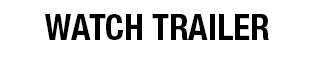

In [99]:
output_image_path = '../data/Challenge_Data/Assets/f52568446cd557df708c44efb668789c/video-cta.jpg'
image = Image.open(output_image_path)
image.show()


Object Positions: {'eng_top_left_pos': (59, 19), 'eng_bottom_right_pos': (555, 784)}


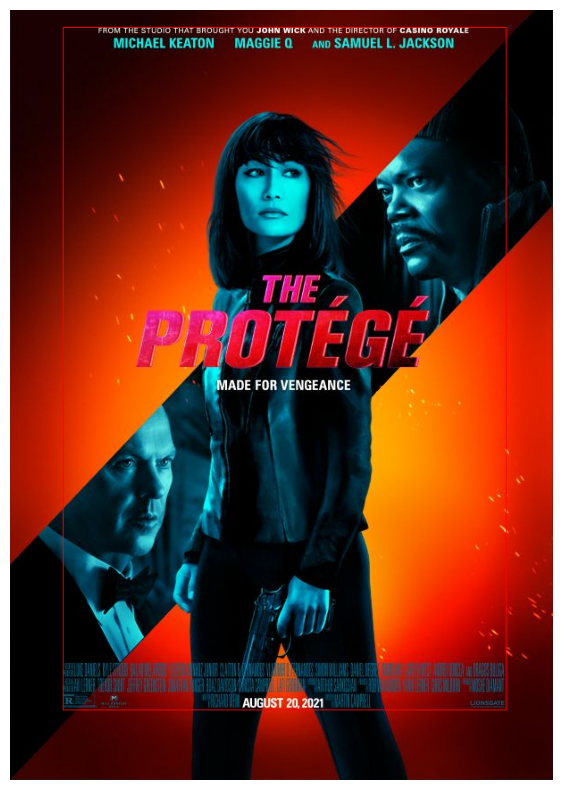

In [65]:
object_positions= locate_image_on_image(
    '../data/Challenge_Data/Assets/f52568446cd557df708c44efb668789c/landing_2.png', 
    '../data/Challenge_Data/Assets/f52568446cd557df708c44efb668789c/endframe.jpg',
    prefix='eng_', 
    visualize=True)


print("Object Positions:", object_positions)

## Text Extraction

In [79]:
from PIL import Image
import openai
from io import BytesIO
import base64


#  Encode the image as a base64 string
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

# Extract text from image using OpenAI
def extract_text_from_image(image_path, model="gpt-4o"):
    base64_image = encode_image(image_path)
    response = openai.ChatCompletion.create(
        response_format={"type": "json_object"},
        model=model,
        messages=[
            {"role": "system", "content": """
             
                        You are a helpful assistant that extracts text from images and provides a summary,
                        key phrases, and an understanding of the narrative  
                        always respond in json format without extracted_text  
             
             """
             },
            {"role": "user", "content": [
                {"type": "text", "text": "Extract the text from this image, summarize it, identify key phrases, and understand the narrative:"},
                {"type": "image_url", "image_url": {
                    "url": f"data:image/png;base64,{base64_image}"}
                }
            ]}
        ],
        temperature=0.0,
    )
    return response.choices[0].message.content

# Example: Extract text from the original image
extracted_text = extract_text_from_image('../data/Challenge_Data/Assets/f52568446cd557df708c44efb668789c/landing_2.png')
print( extracted_text)
import json
# Parse the JSON response
narrative_info = json.loads(extracted_text)


{
  "summary": "The image is a promotional poster for the movie 'The Protégé,' which is set to be released on August 20, 2021. The film features actors Michael Keaton, Maggie Q, and Samuel L. Jackson. It is described as being 'made for vengeance' and is from the studio that brought 'John Wick' and the director of 'Casino Royale.'",
  "key_phrases": [
    "The Protégé",
    "Made for Vengeance",
    "Michael Keaton",
    "Maggie Q",
    "Samuel L. Jackson",
    "August 20, 2021",
    "John Wick",
    "Casino Royale"
  ],
  "narrative": "The poster promotes an action movie titled 'The Protégé,' highlighting its themes of vengeance. It emphasizes the involvement of notable actors and connections to successful action films like 'John Wick' and 'Casino Royale.' The release date is prominently displayed, indicating when audiences can expect to see the film."
}


In [ ]:
import os
import replicate
from replicate.client import Client

replicate = Client(api_token="r8_NywXbs3kBbRzEok67jvaeDkFA3QEAty0MXYuc")
# Ensure you replace 'your_api_token' with the actual token

output = replicate.run(
  "stability-ai/sdxl:39ed52f2a78e934b3ba6e2a89f5b1c712de7dfea535525255b1aa35c5565e08b",
  input={"prompt": "The poster promotes an action movie titled 'The Protégé,' highlighting its themes of vengeance. It features a notable cast and connects the film to successful predecessors like 'John Wick' and 'Casino Royale,' suggesting a high-octane, revenge-driven storyline."
}
)


In [ ]:
from typing import Literal, Optional, Tuple
import logging
from io import BytesIO
import os
import requests
from PIL import Image
from pydantic import HttpUrl
import replicate

# Configurations
replicate = Client(api_token="r8_NywXbs3kBbRzEok67jvaeDkFA3QEAty0MXYuc")
logging.basicConfig(level=logging.INFO)

class ImageGenerater:
    def __init__(self, asset_suggestions: dict) -> None:
        self.asset_suggestions = asset_suggestions

    def generate_images(self, store_location: str ='../images') -> dict:
        generated_images = {}
        for frame, elements in self.asset_suggestions.items():
            if frame.startswith('frame'):
                generated_images[frame] = []
                for type, description in elements.items():
                    # Ensure the prompt is a string
                    if isinstance(description, list):
                        description = ' '.join(description)
                    downloaded_image = ImageGenerater.download_image(ImageGenerater.generate_image(prompt=description)[0], store_location)
                    generated_images[frame].append((type, *downloaded_image))
        return generated_images

    @staticmethod
    def generate_image(prompt: str, performance_selection: Literal['Speed', 'Quality', 'Extreme Speed'] = "Quality", 
                       aspect_ratios_selection: str = "1024*1024", image_seed: int = -1, sharpness: int = 2) -> Optional[dict]:
        """
        Generates an image based on the given prompt and settings.
        """
        try:
            output = replicate.run(
                "stability-ai/sdxl:39ed52f2a78e934b3ba6e2a89f5b1c712de7dfea535525255b1aa35c5565e08b",
                input={
                    "prompt": prompt,
                    "performance_selection": performance_selection,
                    "aspect_ratios_selection": aspect_ratios_selection,
                    "image_seed": image_seed,
                    "sharpness": sharpness
                }
            )
            logging.info("Image generated successfully.")
            return output
        except Exception as e:
            logging.error(f"Failed to generate image: {e}")
            return None

    @staticmethod
    def decode_image(base64_data: str) -> Optional[Image.Image]:
        """
        Converts a base64 image into pillow image object.
        """
        image_data = base64.b64decode(base64_data)
        image_stream = BytesIO(image_data)
        return Image.open(image_stream)
    
    @staticmethod
    def download_image(url: HttpUrl, save_path: str) -> Tuple[str, str]:
        """
        Downloads provided url data to given location.
        """
        try:
            response = requests.get(url)
            if response.status_code == 200:
                save_path = os.path.join(save_path, os.path.basename(url))
                image = Image.open(BytesIO(response.content))
                image.save(save_path)
                logging.info(f"Image saved to {save_path}")
                return (url, save_path)
            else:
                raise RuntimeError(f"Failed to download image. Status code: {response.status_code}") from None
        except Exception as e:
            raise RuntimeError(f"An error occurred: {e}") from e

# Example usage of the ImageGenerater class with narrative information
asset_suggestions = {
    "frame_1": {
        "Animated Element": narrative_info['summary'],
    },
    "frame_2": {
        "CTA Text": ' '.join(narrative_info['key_phrases'])  # Ensure key phrases are concatenated into a single string
    },
    "explanation": narrative_info['summary']
}

image_generator = ImageGenerater(asset_suggestions)
generated_images = image_generator.generate_images(store_location='../data/Challenge_Data/')


INFO:httpx:HTTP Request: POST https://api.replicate.com/v1/predictions "HTTP/1.1 201 Created"
INFO:httpx:HTTP Request: GET https://api.replicate.com/v1/models/stability-ai/sdxl/versions/39ed52f2a78e934b3ba6e2a89f5b1c712de7dfea535525255b1aa35c5565e08b "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: GET https://api.replicate.com/v1/predictions/29ezg6g199rgp0cgnem8q4ftfg "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: GET https://api.replicate.com/v1/predictions/29ezg6g199rgp0cgnem8q4ftfg "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: GET https://api.replicate.com/v1/predictions/29ezg6g199rgp0cgnem8q4ftfg "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: GET https://api.replicate.com/v1/predictions/29ezg6g199rgp0cgnem8q4ftfg "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: GET https://api.replicate.com/v1/predictions/29ezg6g199rgp0cgnem8q4ftfg "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: GET https://api.replicate.com/v1/predictions/29ezg6g199rgp0cgnem8q4ftfg "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: GET https://api.replicate.com/v1/predictions/29ezg6g199rgp0cgnem8q4ftfg "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: GET https://api.replicate.com/v1/predictions/29ezg6g199rgp0cgnem8q4ftfg "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: GET https://api.replicate.com/v1/predictions/29ezg6g199

In [69]:
generated_images

{'frame_1': [('Animated Element',
   'https://replicate.delivery/pbxt/EyCPwwfLhD1dfEOKfXgBodtPfSxukobQzej4CB9NxcbBGFAZC/out-0.png',
   '../data/Challenge_Data/out-0.png')],
 'frame_2': [('CTA Text',
   'https://replicate.delivery/pbxt/JPGAI0zHXRbQLdym6datAfWfjerAeCe9pj8DJzBVT1faZKAyE/out-0.png',
   '../data/Challenge_Data/out-0.png')]}

In [94]:
from typing import Literal, Optional, Tuple
import logging
import os
from io import BytesIO
from PIL import Image
import requests
from dotenv import load_dotenv
import openai

# Configurations
logging.basicConfig(level=logging.INFO)
load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

if not api_key:
    raise ValueError("API key is not set. Make sure it is available in your .env file.")

class ImageGenerater:
    def __init__(self, asset_suggestions: dict) -> None:
        self.asset_suggestions = asset_suggestions

    def generate_images(self, store_location: str ='../images') -> dict:
        generated_images = {}
        for frame, elements in self.asset_suggestions.items():
            if frame.startswith('frame'):
                generated_images[frame] = []
                for type, description in elements.items():
                    if isinstance(description, list):
                        description = ' '.join(description)
                    save_path = os.path.join(store_location, f"{frame}_{type}.png")
                    generated_image_path = ImageGenerater.generate_image(prompt=description, save_path=save_path, image_name=f"{frame}_{type}")
                    generated_images[frame].append((type, generated_image_path))
        return generated_images

    @staticmethod
    def generate_image(prompt: str, save_path: str, image_name: str) -> Optional[str]:
        """
        Generates an image based on the given prompt and settings using OpenAI's DALL-E 3.
        """
        try:
            openai.api_key = api_key
            response = openai.Image.create(
                prompt=prompt,
                n=1,
                size="1024x1024"
            )
            image_url = response['data'][0]['url']
            save_path = ImageGenerater.download_image(image_url, save_path, image_name)
            logging.info("Image generated successfully.")
            return save_path
        except Exception as e:
            logging.error(f"Failed to generate image: {e}")
            return None

    @staticmethod
    def download_image(url: str, save_path: str, image_name: str) -> str:
        """
        Downloads provided url data to given location.
        """
        try:
            response = requests.get(url)
            if response.status_code == 200:
                image = Image.open(BytesIO(response.content))
                image.save(save_path)
                logging.info(f"Image saved to {save_path}")
                return save_path
            else:
                raise RuntimeError(f"Failed to download image. Status code: {response.status_code}") from None
        except Exception as e:
            raise RuntimeError(f"An error occurred: {e}") from e

# Example usage of the ImageGenerater class with narrative information
narrative_info = {

    "narrative": "The poster promotes an action movie titled 'The Protégé,' highlighting its themes of vengeance. It emphasizes the involvement of notable actors and connections to successful action films like 'John Wick' and 'Casino Royale.' The release date is prominently displayed, indicating when audiences can expect to see the film."
}

asset_suggestions = {
    "frame_1": {
        "Animated Element": narrative_info['narrative'],
    }
}

image_generator = ImageGenerater(asset_suggestions)
generated_images = image_generator.generate_images(store_location='../data/Challenge_Data/')
print(generated_images)


INFO:root:Image saved to ../data/Challenge_Data/frame_1_Animated Element.png
INFO:root:Image generated successfully.


{'frame_1': [('Animated Element', '../data/Challenge_Data/frame_1_Animated Element.png')]}


In [126]:

# Define positioning dictionaries with necessary categories
VERTICAL_POSITIONING = {
    'Animated Element': [2], 'landing_2': [1, 2, 3], 'landing_1': [2], 'endframe': [3], '_preview': [1, 2, 3],
    'video-cta-copy': [2], 'mpu-engage': [1, 2], 'video-cta': [1, 2, 3], 'f2-reveal': [2], 'mpu-click': [1, 2],
    'endtext': [2], 'video-placeholder': [1, 2], 'mpu-clickthrough': [2], 'engagement_instruction': [1, 2, 3]
}

HORIZONTAL_POSITIONING = {
    'Animated Element': [2], 'landing_2': [1, 2, 3], 'landing_1': [2], 'endframe': [3], '_preview': [1, 2, 3],
    'video-cta-copy': [1], 'mpu-engage': [2], 'video-cta': [1, 2, 3], 'f2-reveal': [1], 'mpu-click': [2],
    'endtext': [1], 'video-placeholder': [2], 'mpu-clickthrough': [1], 'engagement_instruction': [1, 2, 3]
}

class ImageComposer:
    categories = Literal[
        "Animated Element", "landing_2", "landing_1", "endframe", "_preview",
        "video-cta-copy", "mpu-engage", "video-cta", "f2-reveal", "mpu-click",
        "endtext", "video-placeholder", "mpu-clickthrough", "engagement_instruction"
    ]
    PositionSegment = Tuple[float, float]
    AlignmentPosition = Tuple[int, int]
    AlignmentPositions = List[AlignmentPosition]
    frame_images = List[Tuple[categories, str, str]]

    def __init__(self, width: int, height: int, frames: List[frame_images]) -> None:
        self.width = width
        self.height = height
        self.frames = frames
        self.segments = ImageComposer.get_image_position_segments(width, height)
        self.generated_frames = []

    def generate_frames(self):
        self.compose_frames()
        return self.generated_frames

    def compose_frames(self) -> None:
        self.generated_frames = []
        for frame in self.frames:
            placement_items = []
            for index, item in enumerate(frame):
                if item[0] == "Background":
                    background_index = index
                    continue
                placement_items.append(item)
            background = frame[background_index]
            possibilities = ImageComposer.compute_positions([item[0] for item in placement_items])
            identified_locations = ImageComposer.select_diverse_positions(possibilities)
            adjusted_positions = self.calculate_adjusted_element_positions(identified_locations)
            placement_values = [(x[2], *list(y.values())) for x, y in zip(placement_items, adjusted_positions)]
            self.generated_frames.append(self.create_combined_image(background[2], placement_values))

    @staticmethod
    def compute_positions(elements: List[categories]) -> List[AlignmentPositions]:
        possible_positions = []
        for element in elements:
            vertical_options = VERTICAL_POSITIONING[element]
            horizontal_options = HORIZONTAL_POSITIONING[element]
            combinations = list(itertools.product(vertical_options, horizontal_options))
            possible_positions.append(combinations)
        return possible_positions
    
    @staticmethod
    def select_diverse_positions(possible_positions: List[AlignmentPositions]) -> AlignmentPositions:
        position_frequency = defaultdict(int)
        def update_position_frequency(selected_position):
            position_frequency[selected_position] += 1
        selected_positions = []
        for positions in possible_positions:
            sorted_combinations = sorted(positions, key=lambda x: position_frequency[x])
            lowest_frequency = position_frequency[sorted_combinations[0]]
            lowest_freq_combinations = [pos for pos in sorted_combinations if position_frequency[pos] == lowest_frequency]
            selected_position = random.choice(lowest_freq_combinations)
            selected_positions.append(selected_position)
            update_position_frequency(selected_position)
        return selected_positions

    @staticmethod
    def get_image_position_segments(width: float, height: float, vm: float = 0.6, vo: float = 0.2, hm: float = 0.6, ho: float = 0.2) -> Tuple[List[PositionSegment], List[PositionSegment]]:
        if vm + vo * 2 > 1 or hm + ho * 2 > 1:
            raise ValueError("Sum of percentages exceeds 100% for either vertical or horizontal segments.")
        vertical_mid = height * vm
        vertical_outer = height * vo
        horizontal_mid = width * hm
        horizontal_outer = width * ho
        vertical_segments = [
            (0, vertical_outer),
            (vertical_outer, vertical_outer + vertical_mid),
            (vertical_outer + vertical_mid, height)
        ]
        horizontal_segments = [
            (0, horizontal_outer),
            (horizontal_outer, horizontal_outer + horizontal_mid),
            (horizontal_outer + horizontal_mid, width)
        ]
        segments = []
        for vs in vertical_segments:
            vs_items = []
            for hs in horizontal_segments:
                vs_items.append((vs, hs))
            segments.append(vs_items)
        return segments
    
    def calculate_adjusted_element_positions(self, elements_positions, padding=10):
        element_details = []
        segment_elements = {}
        for i, (v_pos, h_pos) in enumerate(elements_positions):
            segment_key = (v_pos, h_pos)
            if segment_key not in segment_elements:
                segment_elements[segment_key] = []
            segment_elements[segment_key].append(i)
        for segment_key, elements in segment_elements.items():
            v_pos, h_pos = segment_key
            segment = self.segments[v_pos-1][h_pos-1]
            vertical_segment, horizontal_segment = segment
            num_elements = len(elements)
            x_start, x_end = horizontal_segment
            y_start, y_end = vertical_segment
            segment_width = (x_end - x_start) - 2 * padding
            segment_height = (y_end - y_start) - 2 * padding
            is_vertical = segment_height > segment_width
            if is_vertical:
                space_per_element = segment_height / num_elements
            else:
                space_per_element = segment_width / num_elements
            for index, _ in enumerate(elements):
                if is_vertical:
                    element_x_start = x_start + padding
                    element_y_start = y_start + padding + index * space_per_element
                    element_width = segment_width
                    element_height = space_per_element
                else:
                    element_x_start = x_start + padding + index * space_per_element
                    element_y_start = y_start + padding
                    element_width = space_per_element
                    element_height = segment_height
                element_details.append({
                    "start_point": (element_x_start, element_y_start),
                    "dimensions": (element_width, element_height)
                })
        return element_details

    @staticmethod
    def resize_image(image, target_width, target_height):
        original_width, original_height = image.size
        ratio = min(target_width / original_width, target_height / original_height)
        new_width = int(original_width * ratio)
        new_height = int(original_height * ratio)
        resized_image = image.resize((new_width, new_height), Image.LANCZOS)
        return resized_image

    def create_combined_image(self, background_path: str, elements: List[Tuple[str, Union[int, float], Union[int, float]]]) -> Image.Image:
        background = Image.open(background_path).convert("RGBA")
        for element in elements:
            image_path = element[0]
            image = Image.open(image_path).convert("RGBA")
            target_width, target_height = element[2]
            resized_image = ImageComposer.resize_image(image, target_width, target_height)
            start_x, start_y = element[1]
            offset_x = start_x + (target_width - resized_image.size[0]) / 2
            offset_y = start_y + (target_height - resized_image.size[1]) / 2
            background.paste(resized_image, (int(offset_x), int(offset_y)), resized_image)
        return background

if __name__ == "__main__":
    frames = [
        [
            ('Background', '', '../data/Challenge_Data/Assets/f52568446cd557df708c44efb668789c/endframe.jpg'),
            ('Animated Element', '', '../data/Challenge_Data/Assets/f52568446cd557df708c44efb668789c/landing_2.png'),
            ('video-cta', '', '../data/Challenge_Data/Assets/f52568446cd557df708c44efb668789c/video-cta.jpg'),
            ('landing_1', '', '../data/Challenge_Data/Assets/f52568446cd557df708c44efb668789c/landing_1.jpg'),
            ('endframe', '', '../data/Challenge_Data/Assets/f52568446cd557df708c44efb668789c/endframe.jpg'),
            ('_preview', '', '../data/Challenge_Data/Assets/f52568446cd557df708c44efb668789c/_preview.png'),
            ('video-cta-copy', '', '../data/Challenge_Data/Assets/f52568446cd557df708c44efb668789c/video-cta-copy.png'),
            ('mpu-engage', '', '../data/Challenge_Data/Assets/f52568446cd557df708c44efb668789c/mpu-engage.png'),
            ('video-cta', '', '../data/Challenge_Data/Assets/f52568446cd557df708c44efb668789c/video-cta.jpg'),
            ('f2-reveal', '', '../data/Challenge_Data/Assets/f52568446cd557df708c44efb668789c/f2-reveal.png'),
             ('mpu-click', '', '../data/Challenge_Data/Assets/f52568446cd557df708c44efb668789c/mpu-click.png'),
            ('endtext', '', '../data/Challenge_Data/Assets/f52568446cd557df708c44efb668789c/endtext.png'),
            ('video-placeholder', '', '../data/Challenge_Data/Assets/f52568446cd557df708c44efb668789c/video-placeholder.jpg'),
            ('mpu-clickthrough', '', '../data/Challenge_Data/Assets/f52568446cd557df708c44efb668789c/mpu-clickthrough.png'),
            ('engagement_instruction', '', '../data/Challenge_Data/Assets/f52568446cd557df708c44efb668789c/engagement_instruction.png'),
           
     
            
           
        ]
    ]

    ic = ImageComposer(320, 500, frames)
    ic.generate_frames()

    for i, frame in enumerate(ic.generated_frames):
        frame.convert("RGB").save(f'final_ad_frame_{i}.jpg')  # Convert RGBA to RGB before saving as JPEG
